# SVM o máquinas de vectores de soporte

La idea detrás de SVM es encontrar un plano que separe los grupos dentro de los datos de la mejor forma posible. Aquí, la separación significa que la elección del plano maximiza el margen entre los puntos más cercanos en el plano; estos puntos se denominan vectores de soporte.<br>
Las máquinas vectoriales de soporte (SVM) son un potente algoritmo de aprendizaje supervisado que se utiliza para la clasificación o para la regresión. Los SVMs son un clasificador discriminatorio: es decir, trazan un límite entre grupos de datos.


La máquina vectorial de soporte (SVM) aprende un hiperplano para clasificar los datos en 2 clases

Un hiperplano es una función como la ecuación de una recta, y = mx + b. De hecho, para una simple tarea de clasificación con sólo 2 características, el hiperplano puede ser una recta.

SVM puede realizar un truco para proyectar sus datos en dimensiones superiores. Una vez que se proyecta en dimensiones superiores....
...SVM calcula el mejor hiperplano que separa sus datos en las dos clases.

¿Tienes un ejemplo? 
Absolutamente, el ejemplo más simple que encontré comienza con un montón de bolas rojas y azules en una mesa. Si las bolas no están muy mezcladas, puedes tomar un palo y sin moverlo, separarlas con el palo.


Un clasificador discriminatorio intenta trazar una línea entre los dos conjuntos de datos. Inmediatamente vemos un problema: ¡una línea así está mal colocada! Por ejemplo, podríamos encontrar varias posibilidades que discriminan perfectamente entre las clases de este ejemplo:

Warning message in as.POSIXlt.POSIXct(Sys.time()):
"unable to identify current timezone 'H':
please set environment variable 'TZ'"


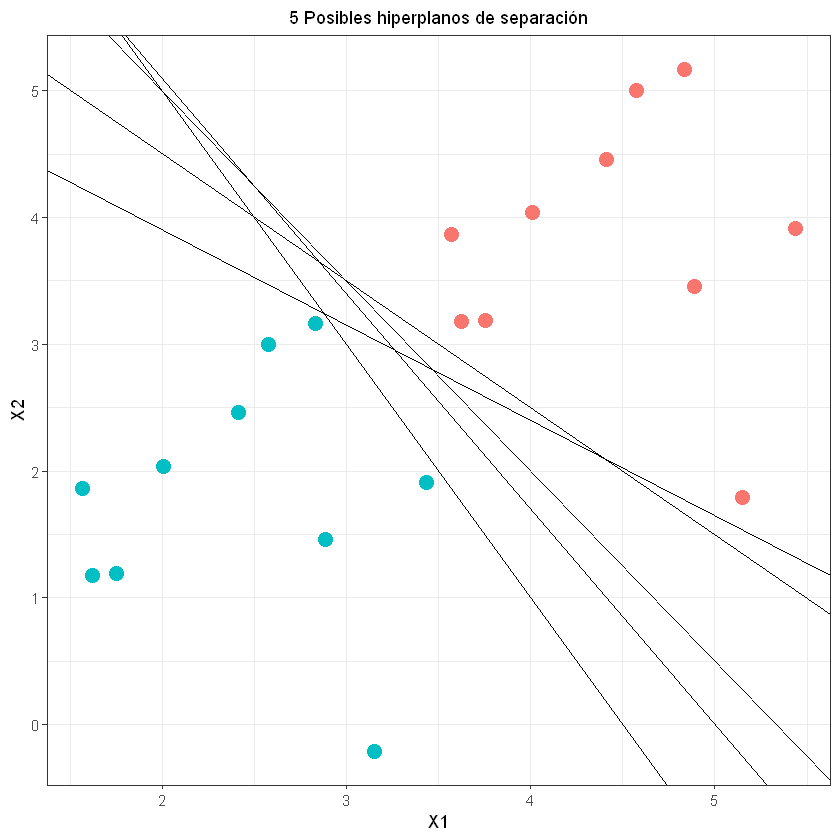

In [2]:
library(ggplot2)
set.seed(68)
X1 <- rnorm(n = 10, mean = 2, sd = 1)
X2 <- rnorm(n = 10, mean = 2, sd = 1)

observaciones <- data.frame(X1 = c(X1, X1 + 2), X2 = c(X2, X2 + 2) ,
                            clase = rep(c(1, -1), each = 10))
observaciones$clase <- as.factor(observaciones$clase)
                      
ggplot() +
  geom_point(data = observaciones, aes(x = X1, y = X2, color = clase), size = 4) +
  geom_abline(intercept = 9, slope = -2) +
  geom_abline(intercept = 8.5, slope = -1.7) +
  geom_abline(intercept = 8, slope = -1.5) +
  geom_abline(intercept = 6.5, slope = -1) +
  geom_abline(intercept = 5.4, slope = -0.75) +
  theme_bw() +
  labs(title = "5 Posibles hiperplanos de separación") +
  theme( legend.position = "none",
  plot.title = element_text(hjust = 0.5, size = 11))

Verás:

Cuando se añade una nueva bola a la mesa, sabiendo en qué lado del palo está la bola, se puede predecir su color.


¿Qué representan las bolas, la mesa y el palo? 
Las bolas representan puntos de datos, y el color rojo y azul representan 2 clases. El palo representa el hiperplano que en este caso es una línea.


El SVM calcula la función para el hiperplano

Los márgenes están a menudo asociados con el SVM? ¿Qué son ellos?<br>
El margen es la distancia entre el hiperplano y los 2 puntos de datos más cercanos de cada clase respectiva. En el ejemplo de bola y mesa, la distancia entre el palo y la bola roja y azul más cercana es el margen.


![maximomargenhiperplano](img/maximomargenhiperplano.png)

El SVM intenta maximizar el margen, de modo que el hiperplano esté tan lejos de la bola roja como la azul. De este modo, se reduce la posibilidad de que se produzcan errores de clasificación.

Observe que las líneas discontinuas tocan un par de puntos: estos puntos son las piezas centrales de este ajuste, y se conocen como los vectores de soporte (dando al algoritmo su nombre). 

Máquinas Vectoriales de Soporte: Maximizan el margen,
Las máquinas vectoriales de soporte son una forma de abordar este problema. Lo que el vector de soporte mecanizado hace es no sólo dibujar una línea, sino considerar una región sobre la línea de un ancho determinado.Como se muestra en la f¿figura anterior.

Note aquí que, si queremos maximizar este ancho, el ajuste medio es claramente el mejor. Esta es la intuición de las máquinas vectoriales de soporte, que optimizan un modelo discriminante lineal junto con un margen que representa la distancia perpendicular entre los conjuntos de datos.

¿Y si las cosas se complican? 
Claro, lo hacen con frecuencia. Si las bolas se mezclan, un palo recto no funcionará.

Warning message in as.POSIXlt.POSIXct(Sys.time()):
"unable to identify current timezone 'H':
please set environment variable 'TZ'"

Attaching package: 'ggplot2'


The following object is masked from 'package:kernlab':

    alpha




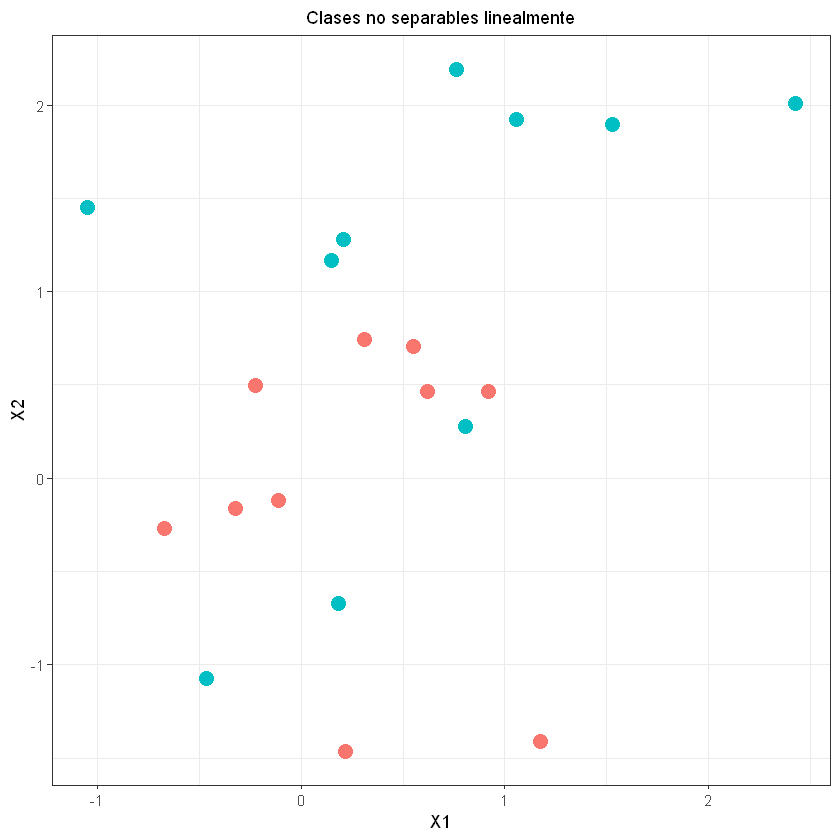

In [22]:
library(ggplot2)
set.seed(101)
coordenadas <- matrix(rnorm(40), 20, 2)
colnames(coordenadas) <- c("X1","X2")
y <- c(rep(-1,10), rep(1,10))
y <- as.factor(y)
coordenadas[y == 1, ] <- coordenadas[y == 1, ] + 1

datos <- data.frame(coordenadas, y)
ggplot(data = datos, aes(x = X1, y = X2, color = as.factor(y))) +
  geom_point(size = 4) +
  theme_bw() +
  labs(title = "Clases no separables linealmente") +
  theme( legend.position = "none",
  plot.title = element_text(hjust = 0.5, size = 11))

Aquí está la solución:

Levante rápidamente la mesa lanzando las bolas al aire. Mientras las bolas están en el aire y se lanzan de la manera correcta, se utiliza una hoja grande de papel para dividir las bolas en el aire.


No, levantar la mesa es el equivalente a mapear sus datos a dimensiones más altas. En este caso, pasamos de la superficie de la mesa de 2 dimensiones a las bolas tridimensionales en el aire.

Cómo lo hace el SVM

Usando un kernel tenemos una buena forma de operar en dimensiones superiores. La gran hoja de papel todavía se llama hiperplano, pero ahora es una función de un plano en lugar de una línea. Nota de Yuval que una vez que estamos en 3 dimensiones, el hiperplano debe ser un plano en lugar de una línea.
Estos videos explicativos pueden ser muy útiles para reforzar el concepto de SVM:

https://www.youtube.com/watch?time_continue=23&v=3liCbRZPrZA

https://www.youtube.com/watch?v=1NxnPkZM9bc


¿Cómo hacen las bolas en una mesa o en el mapa aéreo para obtener datos de la vida real?<br>
Una bola en una mesa tiene una ubicación que podemos especificar usando coordenadas. Por ejemplo, una pelota puede estar a 20 cm del borde izquierdo y a 50 cm del borde inferior. Otra manera de describir la bola es como (x, y) coordenadas o (20, 50). x e y son 2 dimensiones de la bola.<br>
Este es el trato:<br>
Si tuviéramos un conjunto de datos de pacientes, cada paciente podría ser descrito por varias medidas como pulso, nivel de colesterol, presión arterial, etc. Cada una de estas medidas es una dimensión.<br>


La conclusión es que:<br>
El SVM hace lo suyo, los mapea a una dimensión superior y luego encuentra el hiperplano para separar las clases. A continuacion se puede observar un mapeo a una tercera dimension:


![hiperplano_multipledimension](img/hiperplano_multipledimension.png)


En la vida real,dificilmente nos encontramos que las relaciones entre las variables son no lineales; por lo anterior SVM presenta una caracteristica que le permite mapear el probelma en un espacio de alta dimension utilizando un proceso conocido como el truco del Kernel, permitiendo en crear un nuevo espacio dimensional distinto al otriginal que posibilite la separacion lineal. como se puede observar a continuacion:

![kernel_trick](img/kernel_trick.png)

A continuacion se presentan los Kernel mas utilizados:

Gaussian Kernel (RBF)

![kernel_radial](img/kernel_radial.png)

Kernel polinómico

![kernel_plonomico](img/kernel_plonomico.png)

Kernel lineal

![kernle_lineal](img/kernle_lineal.png)

Pasemos al ejemplo donde podamos practicar los conceptos de SMV:

In [23]:
setwd("D:/iush2020/Mineria de datos/notebooks/datasets")

In [24]:
letters <- read.csv("letterdata.csv")

In [25]:
str(letters)

'data.frame':	20000 obs. of  17 variables:
 $ letter: Factor w/ 26 levels "A","B","C","D",..: 20 9 4 14 7 19 2 1 10 13 ...
 $ xbox  : int  2 5 4 7 2 4 4 1 2 11 ...
 $ ybox  : int  8 12 11 11 1 11 2 1 2 15 ...
 $ width : int  3 3 6 6 3 5 5 3 4 13 ...
 $ height: int  5 7 8 6 1 8 4 2 4 9 ...
 $ onpix : int  1 2 6 3 1 3 4 1 2 7 ...
 $ xbar  : int  8 10 10 5 8 8 8 8 10 13 ...
 $ ybar  : int  13 5 6 9 6 8 7 2 6 2 ...
 $ x2bar : int  0 5 2 4 6 6 6 2 2 6 ...
 $ y2bar : int  6 4 6 6 6 9 6 2 6 2 ...
 $ xybar : int  6 13 10 4 6 5 7 8 12 12 ...
 $ x2ybar: int  10 3 3 4 5 6 6 2 4 1 ...
 $ xy2bar: int  8 9 7 10 9 6 6 8 8 9 ...
 $ xedge : int  0 2 3 6 1 0 2 1 1 8 ...
 $ xedgey: int  8 8 7 10 7 8 8 6 6 1 ...
 $ yedge : int  0 4 3 2 5 9 7 2 1 1 ...
 $ yedgex: int  8 10 9 8 10 7 10 7 7 8 ...


In [6]:
letters_train <- letters[1:16000, ]
letters_test  <- letters[16001:20000, ]

In [9]:
install.packages("kernlab")

Installing package into 'C:/Users/JHOVANNY/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'kernlab' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\JHOVANNY\AppData\Local\Temp\RtmpE39UiA\downloaded_packages


In [10]:
library(kernlab)
letter_classifier <- ksvm(letter ~ ., data = letters_train,
                            kernel = "vanilladot")

 Setting default kernel parameters  


In [11]:
letter_classifier

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Linear (vanilla) kernel function. 

Number of Support Vectors : 7037 

Objective Function Value : -14.1746 -20.0072 -23.5628 -6.2009 -7.5524 -32.7694 -49.9786 -18.1824 -62.1111 -32.7284 -16.2209 -32.2837 -28.9777 -51.2195 -13.276 -35.6217 -30.8612 -16.5256 -14.6811 -32.7475 -30.3219 -7.7956 -11.8138 -32.3463 -13.1262 -9.2692 -153.1654 -52.9678 -76.7744 -119.2067 -165.4437 -54.6237 -41.9809 -67.2688 -25.1959 -27.6371 -26.4102 -35.5583 -41.2597 -122.164 -187.9178 -222.0856 -21.4765 -10.3752 -56.3684 -12.2277 -49.4899 -9.3372 -19.2092 -11.1776 -100.2186 -29.1397 -238.0516 -77.1985 -8.3339 -4.5308 -139.8534 -80.8854 -20.3642 -13.0245 -82.5151 -14.5032 -26.7509 -18.5713 -23.9511 -27.3034 -53.2731 -11.4773 -5.12 -13.9504 -4.4982 -3.5755 -8.4914 -40.9716 -49.8182 -190.0269 -43.8594 -44.8667 -45.2596 -13.5561 -17.7664 -87.4105 -107.1056 -37.0245 -30.7133 -112.3218 -32.9619 -27.2971 -35.5

In [12]:
letter_predictions <- predict(letter_classifier, letters_test)

In [13]:
head(letter_predictions)

[1] U N V X N H
Levels: A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

In [14]:
table(letter_predictions, letters_test$letter)

                  
letter_predictions   A   B   C   D   E   F   G   H   I   J   K   L   M   N   O
                 A 144   0   0   0   0   0   0   0   0   1   0   0   1   2   2
                 B   0 121   0   5   2   0   1   2   0   0   1   0   1   0   0
                 C   0   0 120   0   4   0  10   2   2   0   1   3   0   0   2
                 D   2   2   0 156   0   1   3  10   4   3   4   3   0   5   5
                 E   0   0   5   0 127   3   1   1   0   0   3   4   0   0   0
                 F   0   0   0   0   0 138   2   2   6   0   0   0   0   0   0
                 G   1   1   2   1   9   2 123   2   0   0   1   2   1   0   1
                 H   0   0   0   1   0   1   0 102   0   2   3   2   3   4  20
                 I   0   1   0   0   0   1   0   0 141   8   0   0   0   0   0
                 J   0   1   0   0   0   1   0   2   5 128   0   0   0   0   1
                 K   1   1   9   0   0   0   2   5   0   0 118   0   0   2   0
                 L   0   0   0   

In [26]:
agreement <- letter_predictions == letters_test$letter

In [27]:
table(agreement)

agreement
FALSE  TRUE 
  643  3357 

In [28]:
prop.table(table(agreement))

agreement
  FALSE    TRUE 
0.16075 0.83925 

Mejorando la exactitud con otro Kernel

In [29]:
letter_classifier_rbf <- ksvm(letter ~ ., data = letters_train,
                                kernel = "rbfdot")

In [30]:
letter_predictions_rbf <- predict(letter_classifier_rbf,
                                    letters_test)

In [31]:
agreement_rbf <- letter_predictions_rbf == letters_test$letter

In [32]:
table(agreement_rbf)

agreement_rbf
FALSE  TRUE 
  281  3719 

In [33]:
prop.table(table(agreement_rbf))

agreement_rbf
  FALSE    TRUE 
0.07025 0.92975 

Ventajas de SVM

- Puede utilizarse para problemas de clasificación o de predicción numérica
- No está excesivamente influenciado por datos ruidosos y no es muy propenso al sobreajuste
- Puede ser más fácil de utilizar que las redes neuronales, en particular debido a la existencia de varios algoritmos SVM bien apoyados
- Tecnica con alta popularidad debido a su alta precisión y a sus victorias de alto perfil en las competiciones de minería de datos


Desventajas de SVM

- Encontrar el mejor modelo requiere probar varias combinaciones de núcleos y parámetros del modelo
- Puede ser lento de entrenar, particularmente si el conjunto de datos de entrada tiene un gran número de características o ejemplos
- Resultados en un modelo de caja negra complejo que es difícil, si no imposible, de interpretar

Reconocimiento y agradecimiento especial a:

- [Kevin Markham](https://github.com/justmarkham)
- [Janani Ravi](https://www.pluralsight.com/authors/janani-ravi)

In [20]:
from IPython.core.display import HTML
def css_styling():
    styles = open("estilos/custom.css", "r").read()
    return HTML(styles)
css_styling()

ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: unexpected symbol
1: from IPython.core.display
         ^
